# 用標準神經網路做手寫辨識

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 使用 MNIST 數據庫

MNIST 是由CNN創始人Yann LeCun的團隊蒐集的資料集，裏面包含了0-9的手寫數字，類似 Scikit-Learn裡面的 digits dataset，只是圖形的解析度是 (28, 28)。訓練集有60000筆資料，測試集有10000筆資料。

### 由 Keras 載入 MNIST

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 4s 0us/step


In [4]:
len(x_train)

60000

In [5]:
len(x_test)

10000

### 檢查數據集的內容

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

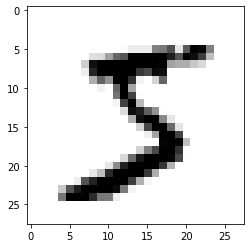

In [8]:
plt.imshow(x_train[0], cmap='gray_r')

In [9]:
y_train[0]

5

### 輸入格式整理

將資料從二維 (28, 28) 的格式，轉乘一維 (784, )的向量。

In [10]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

### 使用 SVM 做做看？

隨著資料集變大，SVM的處理能力會變差。我們常常需要先做特徵擷取的動作再使用SVM來做分類。

e.g., Dlib的人臉辨識中，使用HOG+SVM來做人臉偵測。

In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: No module named 'sklearn'

In [12]:
clf = SVC(gamma=0.001, C=100.)

NameError: name 'SVC' is not defined

In [ ]:
cross_val_score(clf, x_train, y_train, cv=10).mean()

In [ ]:
# Training the model
clf.fit( x_train, y_train) 

### 輸出格式整理

將輸出格式轉換成 One-Hot Encoding (10, )。

In [ ]:
from keras.utils import np_utils

In [ ]:
y_train = np_utils.to_categorical(y_train,10)

In [ ]:
y_test = np_utils.to_categorical(y_test,10)

檢視第一筆資料的格式

In [ ]:
y_train[0]

## 建構神經網路模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

### 使用 Sequential API 建構網路

In [ ]:
model = Sequential()

### 使用model.add()加入網路層

---

Softmax的定義：

$S(y_i)=\frac{e^{y_i}}{\sum_{i} e^{y_i}}$

In [ ]:
import numpy as np
y = np.array([2, 1, 0])
y_p = np.exp(y)/np.exp(y).sum()

In [ ]:
y_p

In [ ]:
y_p.sum()

---

In [ ]:
# 1
model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
# 2
model.add(Dense(256, input_dim=784, kernel_initializer="normal", Activation('relu')))
model.add(Dense(10, kernel_initializer="normal", Activation('softmax')))

In [ ]:
# 3
model.add(Dense(1000, input_dim=784, kernel_initializer="normal", Activation('relu')))
model.add(Dense(10, kernel_initializer="normal", Activation('softmax')))

In [ ]:
# 4
model.add(Dense(1000, input_dim=784, kernel_initializer="normal", Activation('relu')))
model.add(Dropout(0.5))
model.add(Dense(10, kernel_initializer="normal", Activation('softmax')))

### 使用model.compile()將各層組裝起來

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 使用 model.summary()檢視網路

In [ ]:
model.summary()

### 畫出結構圖

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model01.png')

## 訓練神經網路

### 使用 model.fit() 訓練網路

In [ ]:
# model.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=20)
train_history = model.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=10)

### 畫出學習及驗證曲線

In [ ]:
train_history.history.keys()

In [ ]:
plt.plot(train_history.history['accuracy'], label='acc')
plt.plot(train_history.history['val_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('Acc')
plt.legend(loc="upper left")

## 使用我們的模型

### 使用 model.predict_classes() 來辨識圖形

In [ ]:
from ipywidgets import interact_manual

In [ ]:
predict = model.predict_classes(x_test)

In [ ]:
def test(id):
    plt.imshow(x_test[id].reshape(28,28), cmap="gray_r")
    print("辨識結果為:", predict[id])

In [ ]:
interact_manual(test, id = (0, 9999));

In [ ]:
score = model.evaluate(x_test, y_test)

In [ ]:
model.metrics_names

In [ ]:
print('測試資料辨識正確率:', score[1])

## 儲存神經網路模型

參考連結：

https://keras.io/getting_started/faq/

如果沒有 pyh5，需要安裝 :
    
    pip install h5py

### 儲存整個模型

儲存 configurations + weights。

In [ ]:
from tensorflow.keras.models import load_model

model.save('my_model')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

model = load_model('my_model')

### 只儲存權重(weights)

In [ ]:
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')

In [ ]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h5')

### 只儲存模型架構

In [ ]:
# save as JSON
json_string = model.to_json()
open('model.json', 'w').write(model_json)

# model reconstruction from JSON:
from keras.models import model_from_json
model = model_from_json(json_string)